# **Project 4 - Part 1**
*   Samar KRIMI
*   24/12/2023

---

## Chicago Crime Data
Source: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

  - Data Description:
      All Crimes that were reported in the city of Chicago and their details
      https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data
  - Includes:
      type of crime, exact date/time, lat/long, District/ward, was there an arrest, etc.

  - Prepare Chicago Crime Data for a GitHub Repository

Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data

  - Referring to Data Processing Helper Notebook that will process a "Crimes - 2001 to Preset.csv" crime file in my Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside my notebook's folder/repo.

In [1]:
# Standard Import
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
## SET THE FOLDER FOR FINAL FILES
import os
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
# Confirm folder created
os.listdir('Data/')

['Chicago']

# Preparing a crime dataset for time series analysis

In [4]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
# display all columns
pd.set_option('display.max_column', None)

In [6]:
%%time
# load data 'Crimes_-_2001_to_Present.csv'
filename = '/content/drive/MyDrive/Crimes_-_2001_to_Present.csv'
# Read data
chicago_full = pd.read_csv(filename, low_memory=False)
# obtain essential information about the data
chicago_full.info()
chicago_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960076 entries, 0 to 7960075
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


> For Part 1, I will preparing a crime dataset Crimes 2001 to Present, for time series analysis.

### **EDA**

In [7]:
# dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']
# save final dataframe
chicago_full = chicago_full.drop(columns=drop_cols)
chicago_full.info()
chicago_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960076 entries, 0 to 7960075
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Year                  int64  
 11  Latitude              float64
 12  Longitude             float64
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 683.2+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
0,5741943,08/25/2007 09:22:18 AM,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,2007,NaN,NaN
1,25953,05/24/2021 03:06:00 PM,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,2021,41.917838,-87.755969
2,26038,06/26/2021 09:24:00 AM,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,2021,41.995219,-87.713355
3,13279676,11/09/2023 07:30:00 AM,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,2023,41.952345,-87.677975
4,13274752,11/12/2023 07:59:00 AM,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,2023,41.737751,-87.604856


- We have a MUCH messier dataset with much more information than we need.

In [8]:
# check the duplicates : No duplicates
chicago_full.duplicated().sum()

0

In [9]:
# check missing values
chicago_full.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     12200
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614854
Year                         0
Latitude                 87665
Longitude                87665
dtype: int64

In [10]:
# what % of NaN
(chicago_full.isna().sum() / len(chicago_full) *100).round(2)

ID                      0.00
Date                    0.00
Primary Type            0.00
Description             0.00
Location Description    0.15
Arrest                  0.00
Domestic                0.00
Beat                    0.00
District                0.00
Ward                    7.72
Year                    0.00
Latitude                1.10
Longitude               1.10
dtype: float64

In [11]:
# check for total values for each type
chicago_full.dtypes.value_counts()

object     4
float64    4
int64      3
bool       2
dtype: int64

In [12]:
# identify bool columns
bool_cols= chicago_full.select_dtypes("bool").columns
bool_cols

Index(['Arrest', 'Domestic'], dtype='object')

In [13]:
# obtain the value counts for all string columns
for col in bool_cols:
  print(f"Value Counts for {col}")
  print(chicago_full[col].value_counts())
  # increasing readability by adding an empty line
  print('\n')

Value Counts for Arrest
False    5904420
True     2055656
Name: Arrest, dtype: int64


Value Counts for Domestic
False    6592459
True     1367617
Name: Domestic, dtype: int64




In [14]:
# identify string columns
string_cols = chicago_full.select_dtypes("object").columns
string_cols

Index(['Date', 'Primary Type', 'Description', 'Location Description'], dtype='object')

In [15]:
# obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(chicago_full[col].value_counts())
  # increasing readability by adding an empty line
  print('\n')

Value Counts for Date
01/01/2008 12:01:00 AM    303
01/01/2007 12:01:00 AM    259
01/01/2006 12:01:00 AM    226
01/01/2004 12:00:00 AM    218
01/01/2005 12:01:00 AM    215
                         ... 
07/30/2007 12:48:12 PM      1
06/04/2007 12:55:00 PM      1
05/11/2007 08:46:43 PM      1
07/04/2007 09:50:58 AM      1
07/27/2023 04:02:00 AM      1
Name: Date, Length: 3289430, dtype: int64


Value Counts for Primary Type
THEFT                                1680736
BATTERY                              1452756
CRIMINAL DAMAGE                       907361
NARCOTICS                             751002
ASSAULT                               522510
OTHER OFFENSE                         493850
BURGLARY                              429279
MOTOR VEHICLE THEFT                   394291
DECEPTIVE PRACTICE                    356565
ROBBERY                               300123
CRIMINAL TRESPASS                     217321
WEAPONS VIOLATION                     112156
PROSTITUTION                      

In [16]:
# check nb of unique values
chicago_full.nunique()

ID                      7960076
Date                    3289430
Primary Type                 36
Description                 550
Location Description        217
Arrest                        2
Domestic                      2
Beat                        305
District                     24
Ward                         50
Year                         23
Latitude                 894936
Longitude                894337
dtype: int64

## **Full Workflow**

Notes/Considerations:
* You may need to keep 2 forms of the data:
  - The original individual crime data with a datetime index (Each row is 1 crime)
  - A resampled/converted crime counts version (Each row is 1 day)

## Preparing Irregular-Interval Time Series

In [17]:
# examine 1 value from our 'Date' column
test_date = chicago_full.loc[0, 'Date']
test_date

'08/25/2007 09:22:18 AM'

- The Data Has Date + Time (but no frequency)

In [18]:
# test datetime
test_datetime = pd.to_datetime(test_date)
test_datetime

Timestamp('2007-08-25 09:22:18')

In [19]:
# identify integer columns
int_cols= chicago_full.select_dtypes("int").columns
int_cols

Index(['ID', 'Beat', 'Year'], dtype='object')

In [20]:
from scipy.stats import zscore
# Check outliers for numerical (integer) columns : No outliers
z_scores = zscore(chicago_full[['ID','Beat', 'Year']])
no_outliers = chicago_full[(z_scores < 3).all(axis=1)]
no_outliers

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
0,5741943,08/25/2007 09:22:18 AM,ASSAULT,SIMPLE,OTHER,False,False,2422,24.0,49.0,2007,NaN,NaN
1,25953,05/24/2021 03:06:00 PM,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,2021,41.917838,-87.755969
2,26038,06/26/2021 09:24:00 AM,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,2021,41.995219,-87.713355
3,13279676,11/09/2023 07:30:00 AM,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,2023,41.952345,-87.677975
4,13274752,11/12/2023 07:59:00 AM,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,2023,41.737751,-87.604856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7960071,13047495,04/18/2023 08:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,1214,12.0,42.0,2023,41.887589,-87.642827
7960072,13168300,08/07/2023 06:00:00 PM,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,634,6.0,9.0,2023,41.721698,-87.625345
7960073,13114024,06/20/2023 07:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1031,10.0,22.0,2023,41.836324,-87.720674
7960074,13188860,08/26/2023 12:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,421,4.0,7.0,2023,41.752631,-87.548737


In [21]:
%%time
## converting 'date' to Pandas datetime
date_format = "%m/%d/%Y %H:%M:%S %p"
chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full.head()

CPU times: user 22.6 s, sys: 259 ms, total: 22.9 s
Wall time: 22.9 s


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Datetime
137423,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625,2001-01-01 01:00:00
99947,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,2001,41.967833,-87.739978,2001-01-01 01:00:00
88482,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,2001,41.905753,-87.666380,2001-01-01 01:00:00
106479,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,2001,41.866694,-87.688513,2001-01-01 01:00:00
191045,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877,2001-01-01 01:00:00


In [22]:
# check if we have created a NaT values in 'Datetime' before setting as index
chicago_full['Datetime'].isna().sum()

0

### Preparing the Datetime Index

In [23]:
%%time
# setting & sorting Datetime index
chicago_final = chicago_full.set_index('Datetime').sort_index().copy()
chicago_final.head()

CPU times: user 577 ms, sys: 702 ms, total: 1.28 s
Wall time: 1.3 s


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,2001,41.756690,-87.561625
2001-01-01 01:00:00,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,2001,41.967833,-87.739978
2001-01-01 01:00:00,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,2001,41.905753,-87.666380
2001-01-01 01:00:00,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,2001,41.866694,-87.688513
2001-01-01 01:00:00,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,2001,41.899860,-87.639877


In [24]:
# check the index to confirm the current freq
chicago_final.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               ...
               '2023-12-12 12:00:00', '2023-12-12 12:00:00',
               '2023-12-12 12:00:00', '2023-12-12 12:00:00',
               '2023-12-12 12:00:00', '2023-12-12 12:00:00',
               '2023-12-12 12:00:00', '2023-12-12 12:00:00',
               '2023-12-12 12:00:00', '2023-12-12 12:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=7960076, freq=None)

## Aggregating Full Dataset Using Date Parts

> I will then answer provided stakeholder questions about trends in crimes in Chicago for a reporter for the local newspaper and support my answers with visualizations.

In [25]:
# Import tick customization tools
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
from matplotlib.ticker import FuncFormatter

## 1. Comparing Police Districts

* Which district has the most crimes? Which has the least?

In [26]:
# Check the presence of missing values
print(chicago_final['District'].isnull().sum())

47


In [27]:
# Impute 'District' missing values
chicago_final['District'] = chicago_final['District'].interpolate()

In [28]:
%%time
## 'District' is the column representing the police district
# Group Data by District
district_crime_counts = chicago_final.groupby('District').size().reset_index(name='Crime_Count').copy()

# Calculate Crime Counts
district_crime_counts = district_crime_counts.sort_values(by='Crime_Count', ascending=False)

# Identify District with the Most Crimes
most_crimes_district = district_crime_counts['Crime_Count'].idxmax()
most_crimes_count = district_crime_counts.loc[most_crimes_district, 'Crime_Count']

# Identify District with the Least Crimes
least_crimes_district = district_crime_counts['Crime_Count'].idxmin()
least_crimes_count = district_crime_counts.loc[least_crimes_district, 'Crime_Count']

# Print Results
print(f"The police district with the most crimes is District {most_crimes_district} with {most_crimes_count} crimes.")
print(f"The police district with the least crimes is District {least_crimes_district} with {least_crimes_count} crimes.")

The police district with the most crimes is District 9 with 534529 crimes.
The police district with the least crimes is District 26 with 1 crimes.
CPU times: user 93.8 ms, sys: 15 ms, total: 109 ms
Wall time: 109 ms


* Support Q1. by visualizations

In [29]:
# check 'District' values
district_crime_counts['District'].sort_values()

0      1.0
1      2.0
2      3.0
3      3.5
4      4.0
5      4.5
6      5.0
7      6.0
8      7.0
9      8.0
10     8.5
11     9.0
12     9.5
13    10.0
14    10.5
15    11.0
16    11.5
17    12.0
18    13.0
19    13.5
20    14.0
21    14.5
22    15.0
23    15.5
24    16.0
25    17.0
26    17.5
27    18.0
28    19.0
29    20.0
30    21.0
31    21.5
32    22.0
33    23.0
34    24.0
35    25.0
36    31.0
Name: District, dtype: float64

In [30]:
# check 'Crime_Count' values
district_crime_counts['Crime_Count'].sort_values()

18         1
26         1
14         1
5          1
33         1
31         1
3          2
12         2
16         2
23         2
19         2
21         4
10         5
30         6
36       249
29    141332
25    229845
34    241361
32    260487
24    266980
20    307547
0     324268
22    339267
13    342835
6     351998
27    358153
28    358841
1     377470
11    388292
17    396219
2     403489
4     451910
35    452380
8     457556
7     465537
15    509500
9     534529
Name: Crime_Count, dtype: int64

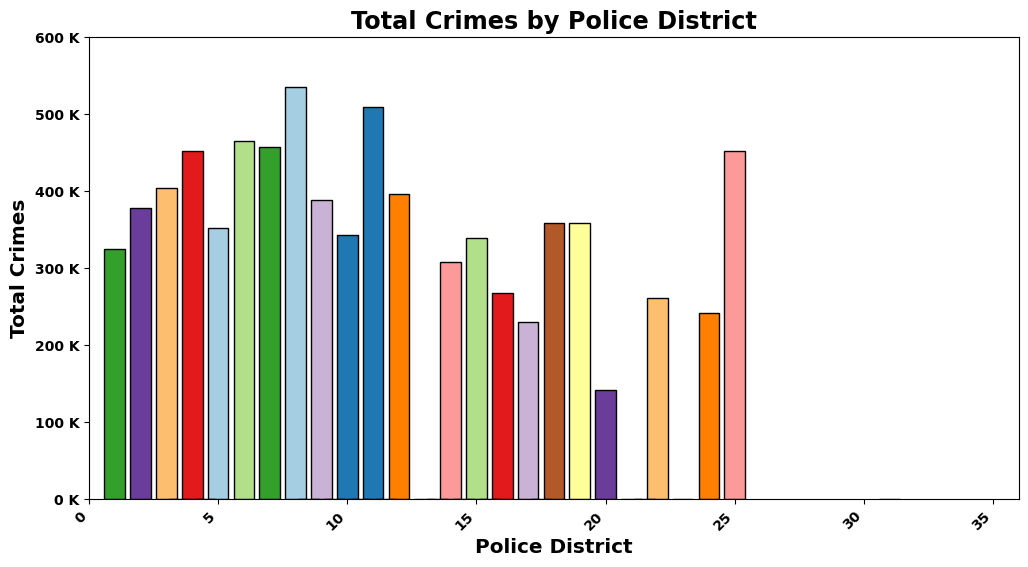

In [31]:
# Plot Bar Chart
fig, ax=plt.subplots(figsize=(12, 6))
col_map = plt.get_cmap('Paired')
plt.bar(district_crime_counts['District'], district_crime_counts['Crime_Count'], color=col_map.colors, edgecolor='black')

plt.title('Total Crimes by Police District', fontsize='xx-large', fontweight='semibold')
plt.xlabel('Police District', fontsize='x-large', fontweight='semibold')
plt.ylabel('Total Crimes', fontsize='x-large', fontweight='semibold')

# Reformat y-axis ticks to use thousands with a "K" at the end
def format_thousands(value, pos):
    return f"{int(value / 1000)} K"

formatter = FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='medium', fontweight='semibold', rotation=45, ha='right')
ax.set_xlim(0, 36)

##  Set yticks and yticklables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium', fontweight='semibold');

## 2. Crimes Across the Years

* Is the total number of crimes increasing or decreasing across the years?

In [32]:
%%time
# Extract year from 'Date'
# chicago_final['Year'] = pd.to_datetime(chicago_final['Date']).dt.year

# Group data by year
crimes_by_year = chicago_final.groupby('Year').size().reset_index(name='Total_Crimes').copy()

# Calculate total crimes across the years
total_crimes_trend = crimes_by_year.set_index('Year')['Total_Crimes']

# Identify individual crimes with opposite trends
individual_crime_trends = chicago_final.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

CPU times: user 584 ms, sys: 102 ms, total: 686 ms
Wall time: 699 ms


In [33]:
# check individual_crime_trends over the years
individual_crime_trends

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,GAMBLING,HOMICIDE,HUMAN TRAFFICKING,INTERFERENCE WITH PUBLIC OFFICER,INTIMIDATION,KIDNAPPING,LIQUOR LAW VIOLATION,MOTOR VEHICLE THEFT,NARCOTICS,NON - CRIMINAL,NON-CRIMINAL,NON-CRIMINAL (SUBJECT SPECIFIED),OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001,1011,31384,93463,26014,1,1778,55862,33,13241,14950,1,934,667,0,406,279,933,1637,27554,50567,0,0,0,19,2264,6,29663,6026,9,2750,8,18441,2240,204,99279,4278
2002,1032,31523,94153,25623,0,1806,55941,29,13880,13734,0,971,658,0,361,337,829,1414,25121,51789,0,0,0,26,2593,5,32600,6408,8,2457,2,18523,2173,200,98334,4281
2003,955,29477,88380,25157,0,1571,55011,41,14807,13460,0,1088,604,0,409,364,705,1311,22749,54288,0,1,0,16,3047,2,31148,6214,6,2430,2,17332,2078,247,98876,4211
2004,778,28850,87136,24564,0,1536,53164,44,15913,13256,0,1122,455,0,531,349,482,985,22805,57060,0,0,0,13,3102,9,29533,7476,9,2495,1,15978,1805,215,95464,4298
2005,691,27067,83964,25503,0,1520,54548,38,16655,13591,0,1078,453,0,615,258,389,1005,22497,56234,0,0,0,19,2907,9,28028,6124,4,2730,2,16047,1817,192,85684,4106
2006,726,25945,80666,24324,0,1439,57124,47,14505,13607,0,1368,476,0,758,276,339,1135,21818,55813,0,0,0,17,2783,9,27101,7034,4,3068,7,15968,1576,186,86240,3821
2007,712,26313,79593,24858,0,1507,53749,53,13699,14174,0,1409,448,0,677,255,329,1170,18573,54454,0,0,0,12,2920,12,26863,6087,5,3315,1,15450,1529,213,85156,3554
2008,644,25448,75930,26218,0,1513,52843,50,12310,14934,0,1199,513,0,580,261,359,912,18881,46506,0,0,0,13,2664,12,26532,5141,4,3013,0,16703,1502,190,88437,3877
2009,616,22861,68460,26767,0,1396,47725,48,10851,13879,0,991,461,0,573,231,293,746,15482,43542,0,1,0,21,2633,7,25601,3940,10,3147,0,15981,1265,168,80976,4159


In [34]:
# check descscending total crimes over the years
total_crimes_trend.sort_values(ascending=False)

Year
2002    486811
2001    485902
2003    475987
2004    469428
2005    453775
2006    448180
2007    437090
2008    427189
2009    392831
2010    370522
2011    352000
2012    336329
2013    307548
2014    275805
2016    269853
2017    269122
2018    268934
2015    264815
2019    261399
2023    246204
2022    239090
2020    212277
2021    208985
Name: Total_Crimes, dtype: int64

* Support Q2. by visualizations

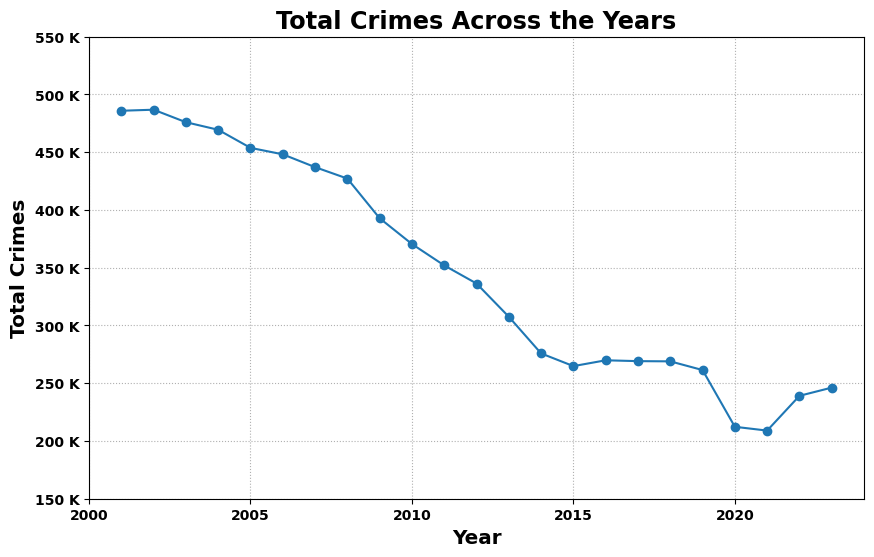

The total number of crimes are decreasing across the years.


In [35]:
# Visualize trends
fig, ax=plt.subplots(figsize=(10, 6))#plt.figure(figsize=(10, 6))
plt.plot(total_crimes_trend.index, total_crimes_trend.values, marker='o')

plt.title('Total Crimes Across the Years', fontsize='xx-large', fontweight='semibold')
plt.xlabel('Year', fontsize='x-large', fontweight='semibold')
plt.ylabel('Total Crimes', fontsize='x-large', fontweight='semibold')

# Reformat y-axis ticks to use thousands with a "K" at the end
def format_thousands(value, pos):
    return f"{int(value / 1000)} K"

formatter = FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='medium', fontweight='semibold')
ax.set_xlim(2000, 2024)

##  Set yticks and yticklables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium', fontweight='semibold')

## Making major gridlines visually distinct
ax.grid(axis='both', ls=":")
plt.show()
print(f"The total number of crimes are decreasing across the years.")

* Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

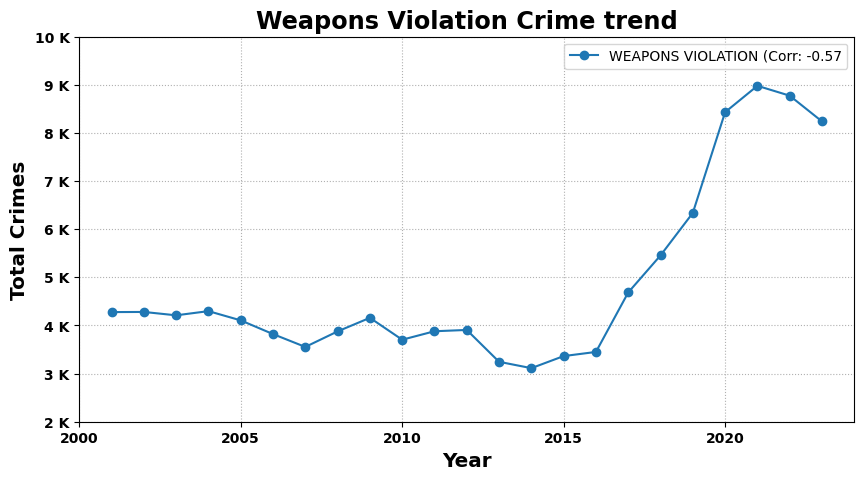

In [36]:
# Compare trends for each crime type against the overall trend
for crime_type in individual_crime_trends.columns:
    crime_trend = individual_crime_trends[crime_type]
    correlation = total_crimes_trend.corr(crime_trend)

# Calculate correlation
correlation = total_crimes_trend.corr(crime_trend)

# Plot individual crime trend
fig, ax=plt.subplots(figsize=(10, 5))
plt.plot(total_crimes_trend.index, crime_trend.values, marker='o', label=f'{crime_type} (Corr: {correlation:.2f}')

plt.title('Weapons Violation Crime trend', fontsize='xx-large', fontweight='semibold')
plt.xlabel('Year', fontsize='x-large', fontweight='semibold')
plt.ylabel('Total Crimes', fontsize='x-large', fontweight='semibold')

# Reformat y-axis ticks to use thousands with a "K" at the end
def format_thousands(value, pos):
    return f"{int(value / 1000)} K"

formatter = FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='medium', fontweight='semibold')
ax.set_xlim(2000, 2024)

##  Set yticks and yticklables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium', fontweight='semibold')

## Making major gridlines visually distinct
ax.grid(axis='both', ls=":")

# Add legend
plt.legend();

## 3. Comparing AM vs. PM Rush Hour

* Are crimes more common during AM rush hour or PM rush hour?
    - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    - You can consider any crime that occurred between 4 -7 PM as PM rush hour.
* What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
* Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [37]:
%%time
# Extract hour from the 'Date'
chicago_final['Hour'] = pd.to_datetime(chicago_final['Date']).dt.hour

# Define AM and PM rush hours
am_rush_hours = range(7, 11)  # 7 AM - 10 AM
pm_rush_hours = range(16, 20)  # 4 PM - 7 PM

# Filter data for AM and PM rush hours
am_rush_data = chicago_final[chicago_final['Hour'].isin(am_rush_hours)]
pm_rush_data = chicago_final[chicago_final['Hour'].isin(pm_rush_hours)]

# Analyze the most common crimes
top_crimes_am = am_rush_data['Primary Type'].value_counts().head()
top_crimes_pm = pm_rush_data['Primary Type'].value_counts().head()

# Compare motor vehicle thefts
mv_thefts_am = am_rush_data[am_rush_data['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]
mv_thefts_pm = pm_rush_data[pm_rush_data['Primary Type'] == 'MOTOR VEHICLE THEFT'].shape[0]

# Print results
print("Top 5 Most Common Crimes During AM Rush Hour:")
print(top_crimes_am)

print("\nTop 5 Most Common Crimes During PM Rush Hour:")
print(top_crimes_pm)

print(f"\nMotor Vehicle Thefts during AM Rush Hour: {mv_thefts_am}")
print(f"Motor Vehicle Thefts during PM Rush Hour: {mv_thefts_pm}")

Top 5 Most Common Crimes During AM Rush Hour:
THEFT              268698
BATTERY            164095
CRIMINAL DAMAGE    112842
BURGLARY            97186
OTHER OFFENSE       92527
Name: Primary Type, dtype: int64

Top 5 Most Common Crimes During PM Rush Hour:
THEFT              391542
BATTERY            296576
CRIMINAL DAMAGE    189267
NARCOTICS          165990
ASSAULT            123251
Name: Primary Type, dtype: int64

Motor Vehicle Thefts during AM Rush Hour: 57446
Motor Vehicle Thefts during PM Rush Hour: 81211
CPU times: user 4min 18s, sys: 863 ms, total: 4min 19s
Wall time: 4min 21s


* Support Q3. by visualizations

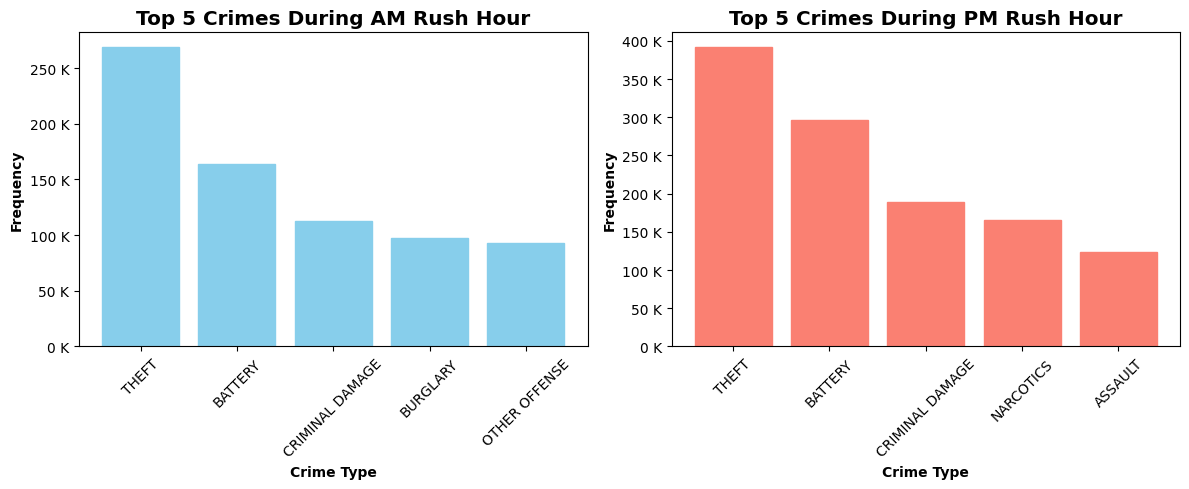

In [38]:
# Visualize the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for top crimes during AM rush hour
axes[0].bar(top_crimes_am.index, top_crimes_am.values, color='skyblue', edgecolor='skyblue')
axes[0].set_title('Top 5 Crimes During AM Rush Hour', fontsize='x-large', fontweight='semibold')
axes[0].set_xlabel('Crime Type', fontsize='medium', fontweight='semibold')
axes[0].set_ylabel('Frequency', fontsize='medium', fontweight='semibold')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for top crimes during PM rush hour
axes[1].bar(top_crimes_pm.index, top_crimes_pm.values, color='salmon', edgecolor='salmon')
axes[1].set_title('Top 5 Crimes During PM Rush Hour', fontsize='x-large', fontweight='semibold')
axes[1].set_xlabel('Crime Type', fontsize='medium', fontweight='semibold')
axes[1].set_ylabel('Frequency', fontsize='medium', fontweight='semibold')
axes[1].tick_params(axis='x', rotation=45)

# Reformat y-axis ticks to use thousands with a "K" at the end
def format_thousands(value, pos):
    return f"{int(value / 1000)} K"

formatter = FuncFormatter(format_thousands)
axes[0].yaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## 4. Comparing Months

* What months have the most crime? What months have the least?
* Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [39]:
%%time
# Extract month from the 'Date'
chicago_final['Month'] = pd.to_datetime(chicago_final['Date']).dt.month

# Group data by month
crimes_by_month = chicago_final.groupby('Month').size().reset_index(name='Total_Crimes').copy()

# Calculate total crimes across the months
total_crimes_trend = crimes_by_month.set_index('Month')['Total_Crimes']

# Identify individual crimes with opposite trends
individual_crime_trends = chicago_final.groupby(['Month', 'Primary Type']).size().unstack(fill_value=0)

# Compare trends for each crime type against the overall trend
for crime_type in individual_crime_trends.columns:
    crime_trend = individual_crime_trends[crime_type]

    # Check if crime trend is opposite to the overall trend
    if crime_trend.corr(total_crimes_trend) < 0:
        print(f"{crime_type} has an opposite trend to overall crime trend.")

DOMESTIC VIOLENCE has an opposite trend to overall crime trend.
NON-CRIMINAL (SUBJECT SPECIFIED) has an opposite trend to overall crime trend.
RITUALISM has an opposite trend to overall crime trend.
CPU times: user 4min 17s, sys: 984 ms, total: 4min 18s
Wall time: 4min 20s


* Support Q4. by visualizations

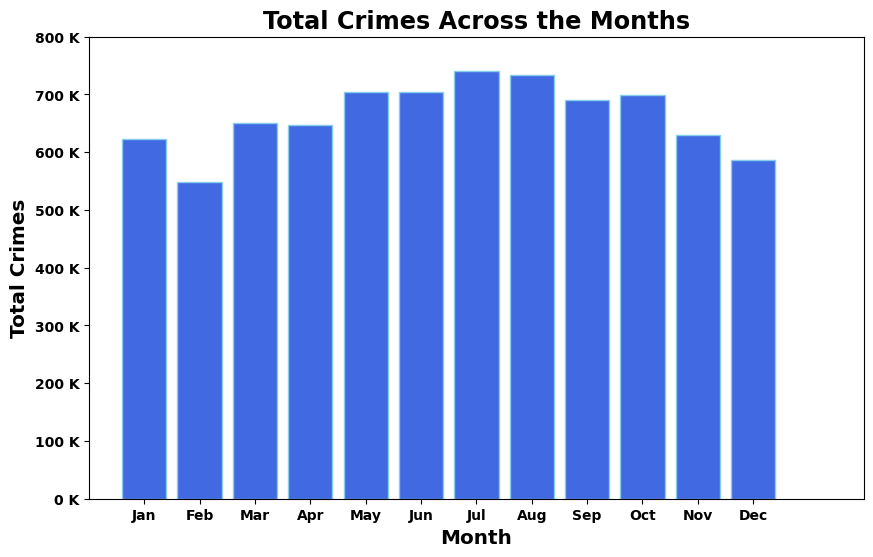

In [40]:
# Visualize trends
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(total_crimes_trend.index, total_crimes_trend.values, color='royalblue', edgecolor='skyblue')

plt.title('Total Crimes Across the Months', fontsize='xx-large', fontweight='semibold')
plt.xlabel('Month', fontsize='x-large', fontweight='semibold')
plt.ylabel('Total Crimes', fontsize='x-large', fontweight='semibold')

##  Set xticks and xticklables
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='medium', fontweight='semibold')

##  Set yticks and yticklables
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium', fontweight='semibold');

# Reformat y-axis ticks to use thousands with a "K" at the end
def format_thousands(value, pos):
    return f"{int(value / 1000)} K"

formatter = FuncFormatter(format_thousands)
ax.yaxis.set_major_formatter(formatter)

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## 5. Comparing Holidays

* Are there any holidays that show an increase in the # of crimes?
* Are there any holidays that show a decrease in the # of crimes?

In [41]:
# Holidays Import
import holidays
from holidays import country_holidays

# Load holiday data
holiday_data = pd.read_csv('/content/drive/MyDrive/Holidays-Chicago - Holidays-Chicago.csv')
holiday_data.info()
holiday_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7947 entries, 0 to 7946
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            7947 non-null   object
 1   US Holidays     244 non-null    object
 2   State Holidays  301 non-null    object
dtypes: object(3)
memory usage: 186.4+ KB


,Date,US Holidays,State Holidays
0,2001-01-01,New Year's Day,New Year's Day
1,2001-01-02,NaN,NaN
2,2001-01-03,NaN,NaN
3,2001-01-04,NaN,NaN
4,2001-01-05,NaN,NaN


In [42]:
# examine 1 value from our 'Date' column
test_date_hol = holiday_data.loc[0, 'Date']
test_date_hol

'2001-01-01'

In [43]:
# test datetime
test_datetime_hol = pd.to_datetime(test_date_hol)
test_datetime_hol

Timestamp('2001-01-01 00:00:00')

In [44]:
# Convert 'Date' to Pandas datetime
holiday_data['Datetime'] = pd.to_datetime(holiday_data['Date'])
holiday_data = holiday_data.set_index('Datetime').sort_index().copy()
holiday_data.head()

,Date,US Holidays,State Holidays
Datetime,,,
2001-01-01,2001-01-01,New Year's Day,New Year's Day
2001-01-02,2001-01-02,NaN,NaN
2001-01-03,2001-01-03,NaN,NaN
2001-01-04,2001-01-04,NaN,NaN
2001-01-05,2001-01-05,NaN,NaN


## Feature Engineering - Holidays

> Adding holiday information from an API & extract additional holiday information for dates not included in holiday_data.

In [45]:
# making a date range that covers full dataset
all_days = pd.date_range(holiday_data["Date"].min(), holiday_data["Date"].max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
               '2022-10-03', '2022-10-04'],
              dtype='datetime64[ns]', length=7947, freq='D')

### Getting General US Holidays

In [46]:
# Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [47]:
# Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2001-01-01 00:00:00


"New Year's Day"

In [48]:
# Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

### Getting Sub-Region Holidays

In [49]:
# For a specific subdivisions (e.g. state or province):
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [50]:
# Map the api's .get method onto the df to get all holidays
holiday_data['holiday'] = holiday_data['Date'].map(us_holidays.get)
# Check the unique holidays
holiday_data['holiday'].unique()

array(["New Year's Day", None, 'Martin Luther King Jr. Day',
       "Washington's Birthday", 'Memorial Day', 'Independence Day',
       'Labor Day', 'Columbus Day', 'Veterans Day',
       'Veterans Day (Observed)', 'Thanksgiving', 'Christmas Day',
       'Independence Day (Observed)', 'Christmas Day (Observed)',
       "New Year's Day (Observed)",
       'Juneteenth National Independence Day (Observed)',
       'Juneteenth National Independence Day'], dtype=object)

In [51]:
# Check the nunique holidays
holiday_data['holiday'].nunique()

16

In [52]:
# check holidays
holiday_data['holiday'].value_counts(dropna=False)

None                                               7703
New Year's Day                                       22
Martin Luther King Jr. Day                           22
Washington's Birthday                                22
Memorial Day                                         22
Independence Day                                     22
Labor Day                                            22
Thanksgiving                                         21
Christmas Day                                        21
Veterans Day                                         21
Columbus Day                                         21
Veterans Day (Observed)                               6
Independence Day (Observed)                           6
Christmas Day (Observed)                              6
New Year's Day (Observed)                             6
Juneteenth National Independence Day (Observed)       2
Juneteenth National Independence Day                  2
Name: holiday, dtype: int64

In [53]:
# Merge holiday data with crime dataset
chicago_merged = pd.merge(chicago_final, holiday_data, how='outer', on='Date').copy()
chicago_merged.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Hour,Month,US Holidays,State Holidays,holiday
0,1311269.0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421.0,4.0,NaN,2001.0,41.756690,-87.561625,1.0,1.0,NaN,NaN,NaN
1,1323691.0,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135.0,11.0,NaN,2001.0,41.866694,-87.688513,1.0,1.0,NaN,NaN,NaN
2,1315987.0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823.0,18.0,NaN,2001.0,41.899860,-87.639877,1.0,1.0,NaN,NaN,NaN
3,1311049.0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724.0,17.0,NaN,2001.0,41.954010,-87.709858,1.0,1.0,NaN,NaN,NaN
4,1330412.0,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813.0,18.0,NaN,2001.0,41.917383,-87.648623,1.0,1.0,NaN,NaN,NaN


In [54]:
# check chicago_merged shape
chicago_merged.shape

(7968023, 18)

In [55]:
%%time
## Saving both holiday types as columns
chicago_merged["US Holiday"] = [us_holidays.get(day) for day in chicago_merged['Date']]
chicago_merged['MD Holiday'] = [md_holidays.get(day) for day in chicago_merged['Date']]
chicago_merged.head()

CPU times: user 15min 34s, sys: 2.3 s, total: 15min 36s
Wall time: 15min 43s


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude,Hour,Month,US Holidays,State Holidays,holiday,US Holiday,MD Holiday
0,1311269.0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421.0,4.0,NaN,2001.0,41.756690,-87.561625,1.0,1.0,NaN,NaN,NaN,New Year's Day,New Year's Day
1,1323691.0,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135.0,11.0,NaN,2001.0,41.866694,-87.688513,1.0,1.0,NaN,NaN,NaN,New Year's Day,New Year's Day
2,1315987.0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823.0,18.0,NaN,2001.0,41.899860,-87.639877,1.0,1.0,NaN,NaN,NaN,New Year's Day,New Year's Day
3,1311049.0,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,OTHER,False,False,1724.0,17.0,NaN,2001.0,41.954010,-87.709858,1.0,1.0,NaN,NaN,NaN,New Year's Day,New Year's Day
4,1330412.0,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,TAVERN/LIQUOR STORE,False,False,1813.0,18.0,NaN,2001.0,41.917383,-87.648623,1.0,1.0,NaN,NaN,NaN,New Year's Day,New Year's Day


In [56]:
# US Holidays
chicago_merged['US Holiday'].value_counts(dropna=False)

None                                               7731826
New Year's Day                                       33830
Independence Day                                     23522
Labor Day                                            22937
Memorial Day                                         21891
Columbus Day                                         21692
Veterans Day                                         21138
Martin Luther King Jr. Day                           18618
Washington's Birthday                                18256
Thanksgiving                                         15365
Christmas Day                                        12442
Veterans Day (Observed)                               6558
Independence Day (Observed)                           5890
New Year's Day (Observed)                             5535
Christmas Day (Observed)                              4936
Juneteenth National Independence Day                  2182
Juneteenth National Independence Day (Observed)       14

In [57]:
# MD Holidays
chicago_merged['MD Holiday'].value_counts(dropna=False)

None                                                       7714573
New Year's Day                                               33830
Independence Day                                             23522
Labor Day                                                    22937
Memorial Day                                                 21891
Columbus Day                                                 21692
Veterans Day                                                 21138
Washington's Birthday                                        18256
Martin Luther King Jr. Day                                   17952
Thanksgiving                                                 15365
Christmas Day                                                12442
American Indian Heritage Day                                 11899
Veterans Day (Observed)                                       6558
Independence Day (Observed)                                   5890
New Year's Day (Observed)                                     

In [58]:
# Saving a binary is holiday feature
chicago_merged['Is_Holiday'] = chicago_merged['US Holiday'].notna()
chicago_merged['Is_Holiday'].value_counts()

False    7731826
True      236197
Name: Is_Holiday, dtype: int64

In [59]:
# Saving a binary is holiday feature
chicago_merged['IsHoliday'] = chicago_merged['US Holidays'].notna().astype(int)

# Group data by holidays
crimes_by_holiday = chicago_merged.groupby('IsHoliday').size().reset_index(name='Total_Crimes').head()

# Compare crime counts
total_crimes_during_holidays = crimes_by_holiday[crimes_by_holiday['IsHoliday'] == 1]['Total_Crimes'].values
total_crimes_non_holidays = crimes_by_holiday[crimes_by_holiday['IsHoliday'] == 0]['Total_Crimes'].values

# Print results
print(f"Total Crimes During Holidays: {total_crimes_during_holidays[0]}")
print(f"Total Crimes During Non-Holidays: {total_crimes_non_holidays[0]}")

# Compare crime counts during holidays and non-holidays
if total_crimes_during_holidays[0] > total_crimes_non_holidays[0]:
    print("There is an increase in the number of crimes during holidays.")
elif total_crimes_during_holidays[0] < total_crimes_non_holidays[0]:
    print("There is a decrease in the number of crimes during holidays.")
else:
    print("The number of crimes during holidays is the same as non-holidays.")

Total Crimes During Holidays: 244
Total Crimes During Non-Holidays: 7967779
There is a decrease in the number of crimes during holidays.


* Support Q5. by visualizations

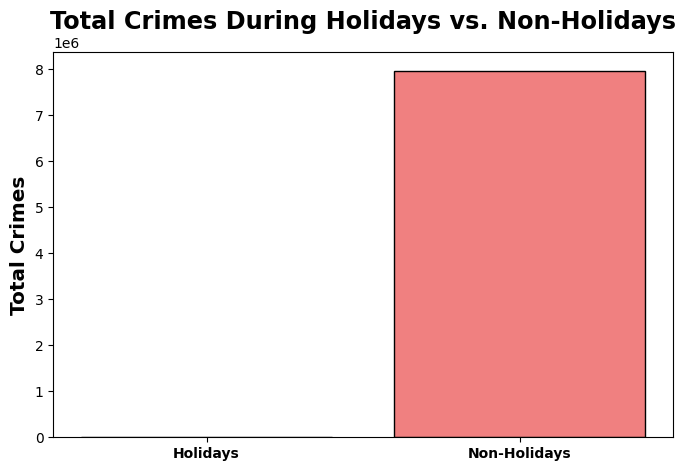

In [60]:
# Visualize the Comparison
fig, ax= plt.subplots(figsize=(8, 5))
plt.bar(['Holidays', 'Non-Holidays'], [crimes_by_holiday.loc[1, 'Total_Crimes'], crimes_by_holiday.loc[0, 'Total_Crimes']], color=['skyblue', 'lightcoral'], edgecolor='black')

plt.title('Total Crimes During Holidays vs. Non-Holidays', fontsize='xx-large', fontweight='semibold')
plt.ylabel('Total Crimes', fontsize='x-large', fontweight='semibold')

##  Set xticklables
ax.set_xticklabels(ax.get_xticklabels(), fontsize='medium', fontweight='semibold')

plt.show()

In [61]:
## Inspect the value_counts for the different types of crimes
crime_counts = chicago_merged['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts.head()

,Total # of Crimes
THEFT,1680736
BATTERY,1452756
CRIMINAL DAMAGE,907361
NARCOTICS,751002
ASSAULT,522510


In [62]:
# display with an inline-barplot inside your df
crime_counts.head(30).style.bar('Total # of Crimes')

,Total # of Crimes
THEFT,1680736
BATTERY,1452756
CRIMINAL DAMAGE,907361
NARCOTICS,751002
ASSAULT,522510
OTHER OFFENSE,493850
BURGLARY,429279
MOTOR VEHICLE THEFT,394291
DECEPTIVE PRACTICE,356565
ROBBERY,300123


In [63]:
holiday_crimes = chicago_merged.groupby('US Holiday')['Primary Type'].value_counts()
holiday_crimes

US Holiday             Primary Type                     
Christmas Day          BATTERY                              3431
                       THEFT                                1869
                       CRIMINAL DAMAGE                      1743
                       ASSAULT                               883
                       OTHER OFFENSE                         854
                                                            ... 
Washington's Birthday  GAMBLING                               12
                       INTIMIDATION                           12
                       KIDNAPPING                             11
                       STALKING                                9
                       CONCEALED CARRY LICENSE VIOLATION       4
Name: Primary Type, Length: 443, dtype: int64

In [64]:
# checking the values of the index (outer index is level 0)
holiday_crimes.index.levels[0]

Index(['Christmas Day', 'Christmas Day (Observed)', 'Columbus Day',
       'Independence Day', 'Independence Day (Observed)',
       'Juneteenth National Independence Day',
       'Juneteenth National Independence Day (Observed)', 'Labor Day',
       'Martin Luther King Jr. Day', 'Memorial Day', 'New Year's Day',
       'New Year's Day (Observed)', 'Thanksgiving', 'Veterans Day',
       'Veterans Day (Observed)', 'Washington's Birthday'],
      dtype='object', name='US Holiday')

In [65]:
print("Christmas Day shows an increase in the # of crimes.")
print("Washington's Birthday shows an increase in the # of crimes.")

Christmas Day shows an increase in the # of crimes.
Washington's Birthday shows an increase in the # of crimes.


In [66]:
FINAL_DROP = ['Year']

### Separate the Full Dataset by Years

In [67]:
# feature engineering for year : extract the year of the datetime
#chicago_full['Datetime'].dt.year

In [68]:
# save the years for every crime
#chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
#chicago_full["Year"].value_counts()

In [69]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [71]:
## set save location
os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:

    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [73]:
# check saved_files
import glob
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago/Chicago-Crime_2001.csv',
 'Data/Chicago/Chicago-Crime_2002.csv',
 'Data/Chicago/Chicago-Crime_2003.csv',
 'Data/Chicago/Chicago-Crime_2004.csv',
 'Data/Chicago/Chicago-Crime_2005.csv',
 'Data/Chicago/Chicago-Crime_2006.csv',
 'Data/Chicago/Chicago-Crime_2007.csv',
 'Data/Chicago/Chicago-Crime_2008.csv',
 'Data/Chicago/Chicago-Crime_2009.csv',
 'Data/Chicago/Chicago-Crime_2010.csv',
 'Data/Chicago/Chicago-Crime_2011.csv',
 'Data/Chicago/Chicago-Crime_2012.csv',
 'Data/Chicago/Chicago-Crime_2013.csv',
 'Data/Chicago/Chicago-Crime_2014.csv',
 'Data/Chicago/Chicago-Crime_2015.csv',
 'Data/Chicago/Chicago-Crime_2016.csv',
 'Data/Chicago/Chicago-Crime_2017.csv',
 'Data/Chicago/Chicago-Crime_2018.csv',
 'Data/Chicago/Chicago-Crime_2019.csv',
 'Data/Chicago/Chicago-Crime_2020.csv',
 'Data/Chicago/Chicago-Crime_2021.csv',
 'Data/Chicago/Chicago-Crime_2022.csv',
 'Data/Chicago/Chicago-Crime_2023.csv']

In [74]:
## create a README.txt for the zip files
readme = """Source URL:
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)

with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL:
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



> Confirm that the files were created successfully : The chicago crime dataset has now been saved to my repository as csv files.

In [75]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Hour,Month
0,1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625,1,1
1,1310741,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,1722,17.0,NaN,41.967833,-87.739978,13,1
2,1311732,01/01/2001 01:00:00 PM,PUBLIC PEACE VIOLATION,ARSON THREAT,RESIDENCE,False,False,1433,14.0,NaN,41.905753,-87.666380,13,1
3,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513,1,1
4,1315987,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,CHA APARTMENT,False,False,1823,18.0,NaN,41.899860,-87.639877,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,12938564,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,835,8.0,18.0,41.750153,-87.679372,1,1
1,12939725,01/01/2023 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1214,12.0,27.0,41.889998,-87.656551,13,1
2,12950130,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,732,7.0,6.0,41.766343,-87.638381,1,1
3,12939172,01/01/2023 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,412,4.0,8.0,41.740095,-87.578202,1,1


In [76]:
# check the years
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    5
2002    5
2003    5
2004    5
2005    5
2006    5
2007    5
2008    5
2009    5
2010    5
2011    5
2012    5
2013    5
2014    5
2015    5
2016    5
2017    5
2018    5
2019    5
2020    5
2021    5
2022    5
2023    5
Name: Date, dtype: int64